# September 18, 2020

## Goal
Students should learn to read in and analyze image files to distinguish relevant data from noise.

# Exercise 1

In [77]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image;

Let's start by reading in the image file and plotting it with matplotlib.

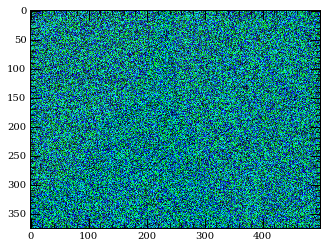

In [78]:
puzzle = image.imread("iron-puzzle.png")
fig, axes = plt.subplots()
plt.imshow(puzzle);

That noisy picture presents no obvious information, so we will need to analyze the file to find a way to get the meaningful information stored in this file, cutting out noise.

In [79]:
# Examine the shape of the image array.

height, width, colors = puzzle.shape
print(height)
print(width)
print(colors)

375
500
4


The first two numbers indicate image size.

The last number, 4, corresponds to the  4 values stores in each pixel:
(red, green, blue, transparency (also known as alpha)).


To diagnose the problem in this data, we can begin with a histogram of the values stored in each of the three colors. We begin by creating arrays to store reds, greens, and blues.

In [80]:
# Create separate arrays for red, green, and blue values the image
reds = []  # Create an empty list
greens = []
blues = []
for row in puzzle:
    reds.append(row[:,0]) # append the red (0th) values of the pixels in each row to this list
    greens.append(row[:,1])
    blues.append(row[:,2])
reds = np.array(reds)
greens = np.array(greens)
blues = np.array(blues)
print(reds.shape)
# Check the length to compare it to the shape of the puzzle image
print("Length of 'reds' is {0}".format(len(reds)))

(375, 500)
Length of 'reds' is 375


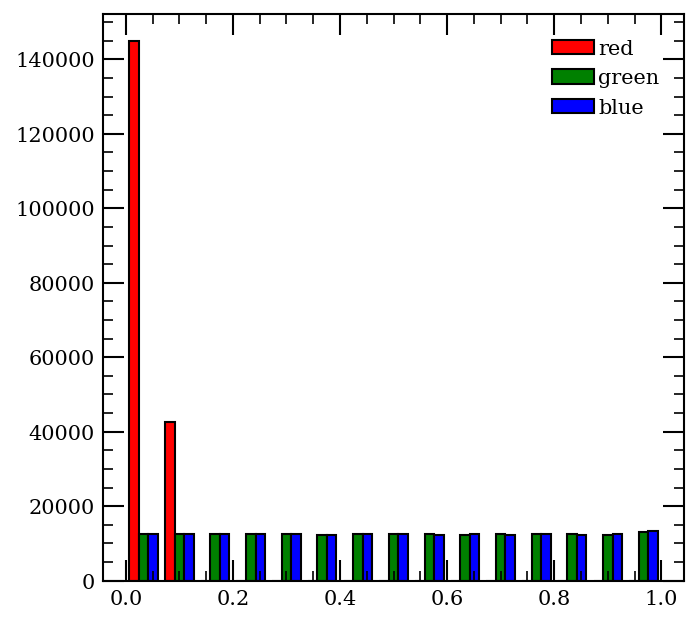

In [81]:
# Now let's examine the red, green and blue values 
# stored in this image to see if we can find anything
# interesting.

fig, axes = plt.subplots(figsize=(5,5), dpi=150)
axes.hist([reds.flatten(), greens.flatten(), blues.flatten()], 
          label=['red', 'green', 'blue'], color=['r', 'g', 'b'],
          bins=15)
axes.legend();

It looks like red values might contain some interesting information, but it is low in amplitude, but blue and green are distributed rather evenly. We can interpret this as blue and green values acting as noise in this image, and set them to zero. Since all red values appear to fall below 0.1, we will multply red values by 10 to amplify the signal.

In [82]:
colors_to_set_to_zero = [1, 2]  # red:0, green:1, blue:2
colors_to_amplify = [0]
amplification_factor = 10.0

In [83]:
# Cycle through the row and column numbers to go through all pixels
for ii in range(height):
    for jj in range(width):
        
        # Cycle through the colors that need to be set to zero
        for zerocolor in colors_to_set_to_zero:
            puzzle[ii][jj][zerocolor] = 0
        # Amplify the appropriate colors by the correct factor
        for ampcolor in colors_to_amplify:
            puzzle[ii][jj][ampcolor] = amplification_factor * puzzle[ii][jj][ampcolor]

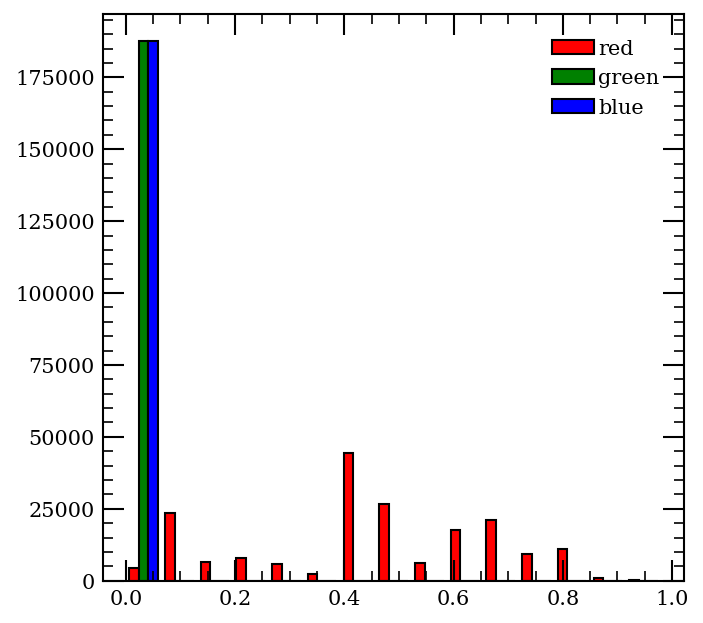

In [84]:
# Check out how the new image values look

reds = []
greens = []
blues = []
for row in puzzle:
    reds.append(row[:,0])
    greens.append(row[:,1])
    blues.append(row[:,2])
reds = np.array(reds)
greens = np.array(greens)
blues = np.array(blues)

fig, axes = plt.subplots(figsize=(5,5), dpi=150)
axes.hist([reds.flatten(), greens.flatten(), blues.flatten()], 
          label=['red', 'green', 'blue'], color=['r', 'g', 'b'],
          bins=15)
axes.legend();

Looks like we can see some structure among the red values in this image, and all blue and green values have been reduced to zero. Let's look at the de-noised image now.

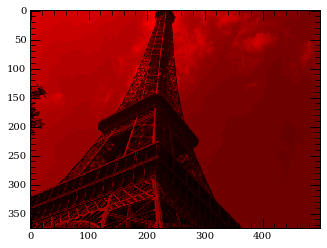

In [85]:
fig, axes = plt.subplots()
plt.imshow(puzzle);

Ta-da!


# Excercise 2
Now, it's your turn to examine the red, green, and blue values of a different noisy image and figure out a way to get just the signal out of it.

In [87]:
# Read in image
puzzle = image.imread("copper-puzzle.png")


In [88]:
# Compile arrays of red, green, and blue values


In [89]:
# Make a histogram


In [ ]:
# Pick the colors that you think are noise or signal

In [ ]:
# Cycle through the row and column numbers to go through all pixels
# and fix the signal-to-noise

In [ ]:
# Plot a histogram of the new image values 


In [ ]:
# Examine the final image


# Excercise 3


In [ ]:
# You know what to do!
puzzle = image.imread("canvas.png")


Now, try amplifying the signal so that some values are greater than 1. Since matplotlib will only display values between 0 and 1, do you expect to see anything interesting in the new image?

# Bonus
This puzzle is a little less straight-forward. This puzzle contains an image of the Horsehead nebula. Try to reconstruct it to match the colorized image from NASA: https://science.nasa.gov/horsehead-nebula

In [140]:
puzzle = image.imread("third_puzzle.png")
height, width, colors = puzzle.shape
print(height)
print(width)
print(colors)


710
960
4


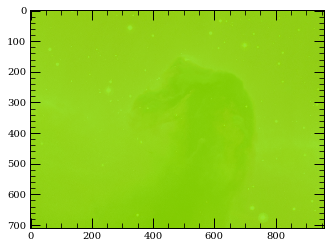

In [141]:
fig, axes = plt.subplots()
plt.imshow(puzzle);

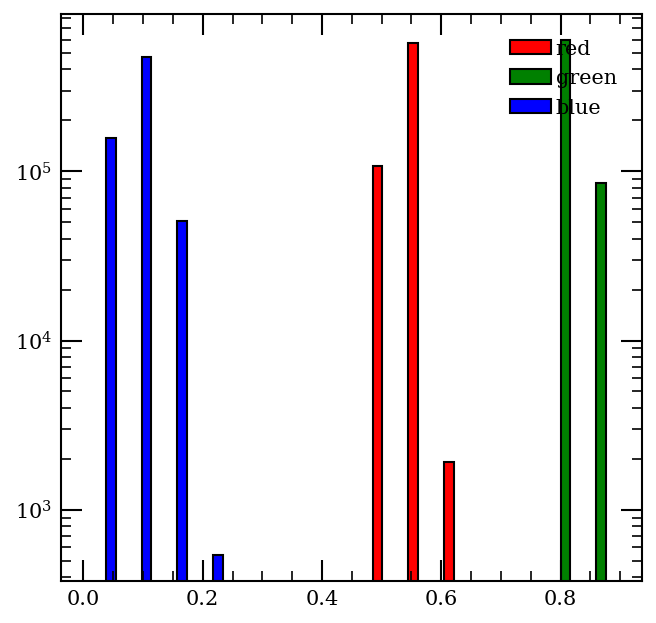

In [142]:
# Compile arrays of red, green, and blue values

reds = []
greens = []
blues = []
for row in puzzle:
    reds.append(row[:,0])
    greens.append(row[:,1])
    blues.append(row[:,2])

reds = np.array(reds)
greens = np.array(greens)
blues = np.array(blues)

# Make a histogram
fig, axes = plt.subplots(figsize=(5,5), dpi=150)
axes.hist([reds.flatten(), greens.flatten(), blues.flatten()], 
          label=['red', 'green', 'blue'], color=['r', 'g', 'b'],
          bins=15)
axes.set(yscale='log')
axes.legend();

In [ ]:
fig, axes = plt.subplots()
plt.imshow(newpuzzle);

In [143]:
# Pick the colors that you think are noise,
# and colors that contain signal that you can amplify


colors_to_amplify = [0, 1, 2]
amplification_factors = [10, 5, 4]
offsets = [0,0,0]

# Cycle through the row and column numbers to go through all pixels
for ii in range(height):
    for jj in range(width):
        # Amplify the appropriate colors by the correct factor
        for kk, ampcolor in enumerate(colors_to_amplify):
            puzzle[ii][jj][ampcolor] = (amplification_factors[kk] * np.float32(puzzle[ii][jj][ampcolor]))+offsets[kk]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


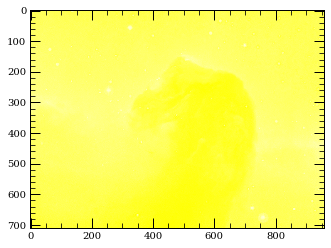

In [144]:
fig, axes = plt.subplots()
plt.imshow(puzzle);

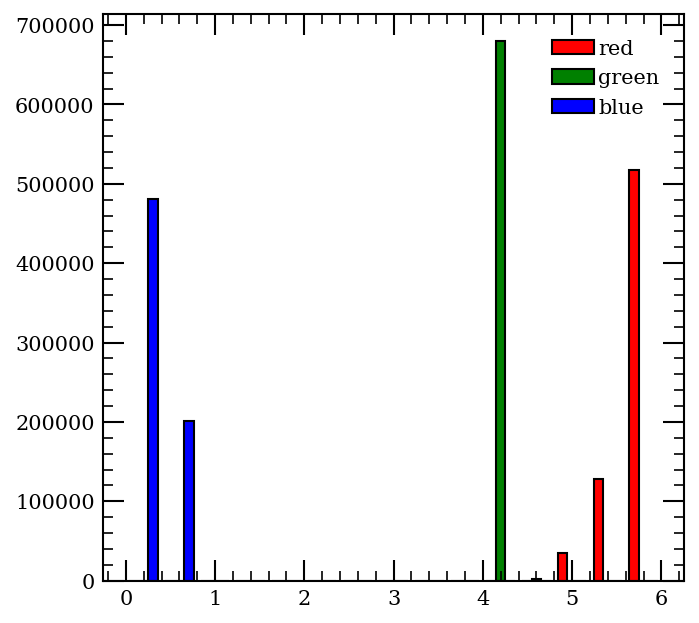

In [145]:
# Compile arrays of red, green, and blue values

reds = []
greens = []
blues = []
for row in puzzle:
    reds.append(row[:,0])
    greens.append(row[:,1])
    blues.append(row[:,2])

reds = np.array(reds)
greens = np.array(greens)
blues = np.array(blues)

# Make a histogram
fig, axes = plt.subplots(figsize=(5,5), dpi=150)
axes.hist([reds.flatten(), greens.flatten(), blues.flatten()], 
          label=['red', 'green', 'blue'], color=['r', 'g', 'b'],
          bins=15)
axes.legend();